In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3953,-118.65,34.21,5.0,5429.0,665.0,2315.0,687.0,9.6465,<1H OCEAN,500001.0
16667,-120.68,35.26,26.0,1704.0,315.0,918.0,310.0,3.2464,NEAR OCEAN,208000.0
7976,-118.20,33.87,36.0,1554.0,273.0,974.0,264.0,4.2135,<1H OCEAN,161400.0
4816,-118.29,34.05,40.0,907.0,349.0,1426.0,323.0,1.8571,<1H OCEAN,143800.0
14308,-117.13,32.71,37.0,1220.0,325.0,1472.0,323.0,1.8250,NEAR OCEAN,81500.0
...,...,...,...,...,...,...,...,...,...,...
3023,-119.46,35.17,40.0,4164.0,812.0,1998.0,773.0,2.8323,INLAND,50800.0
15567,-117.03,33.12,25.0,3142.0,446.0,1286.0,419.0,5.4663,<1H OCEAN,248300.0
19552,-120.99,37.63,21.0,319.0,120.0,276.0,85.0,2.4792,INLAND,60000.0
10412,-117.61,33.67,3.0,4541.0,720.0,1600.0,583.0,6.8004,<1H OCEAN,284900.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

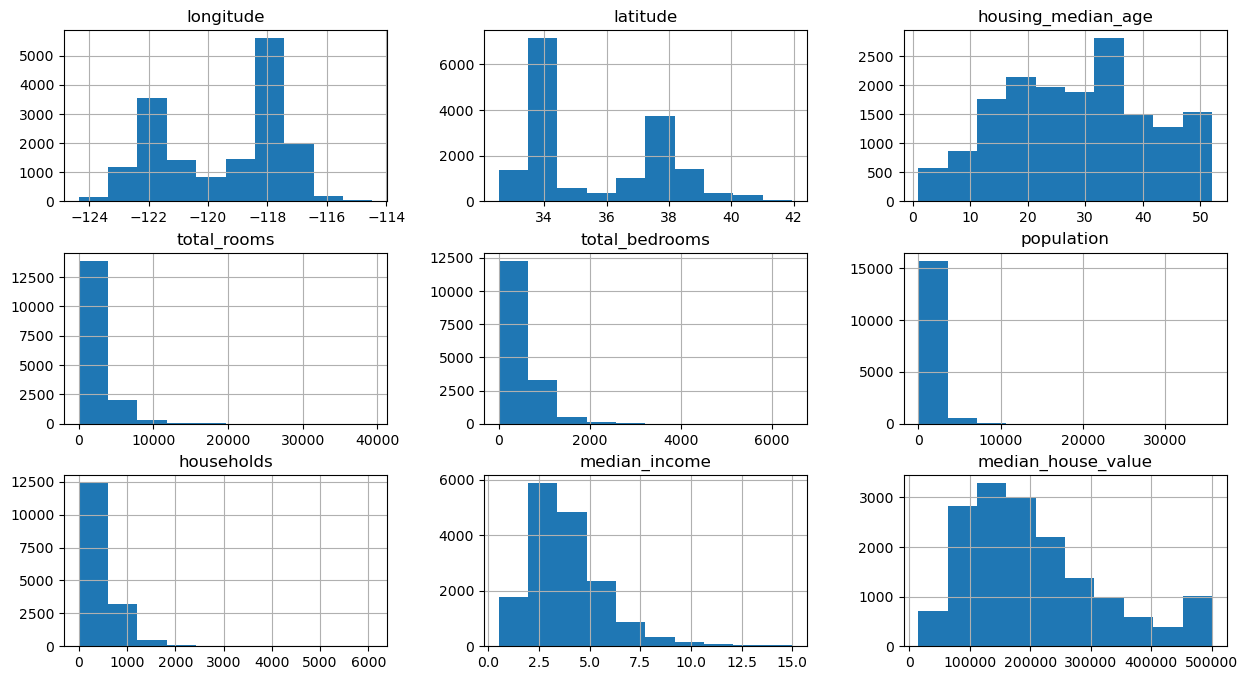

In [9]:
train_data.hist(figsize = (15, 8))

<AxesSubplot:>

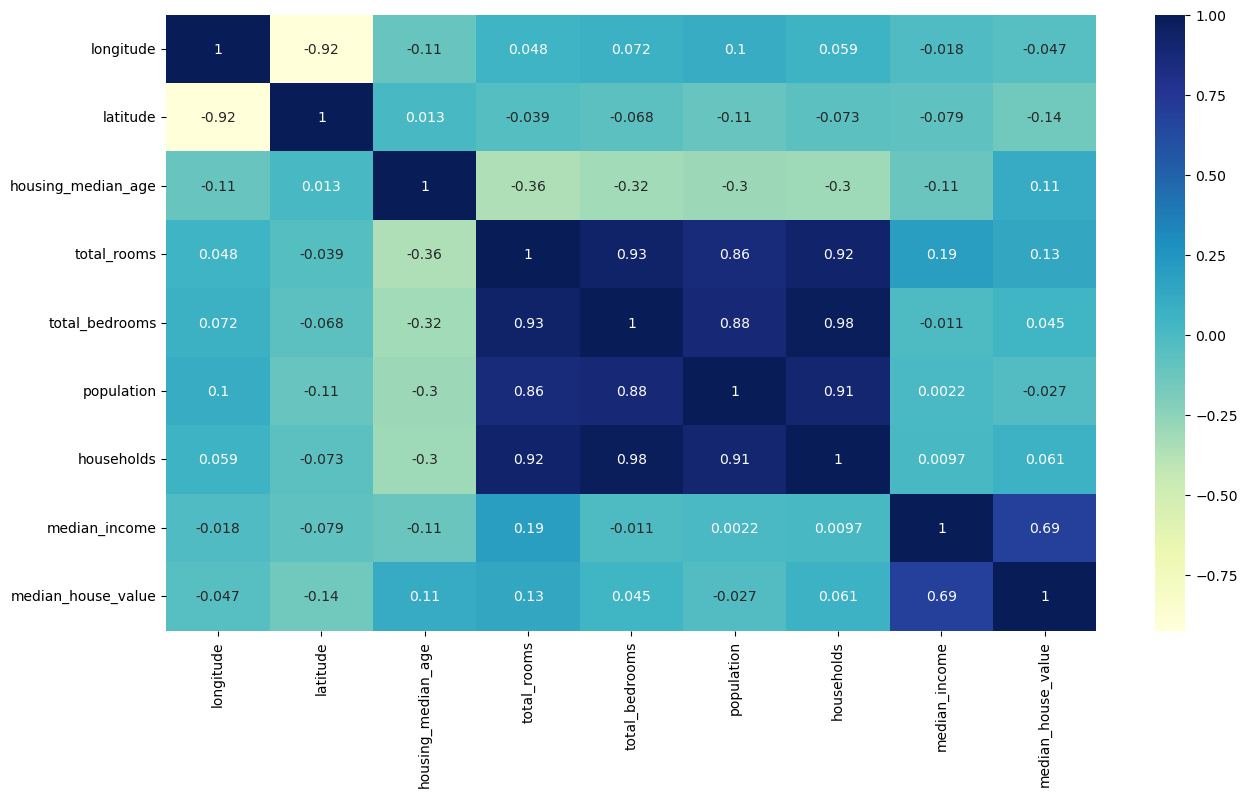

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = "YlGnBu")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

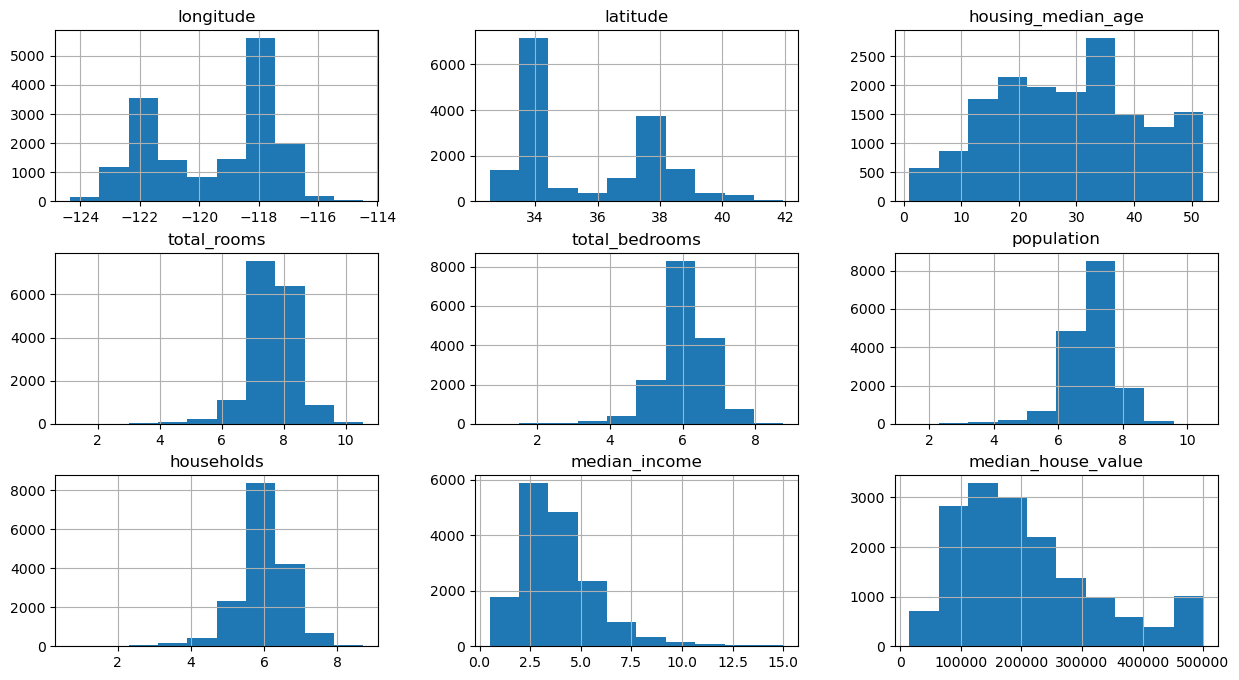

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize = (15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<AxesSubplot:>

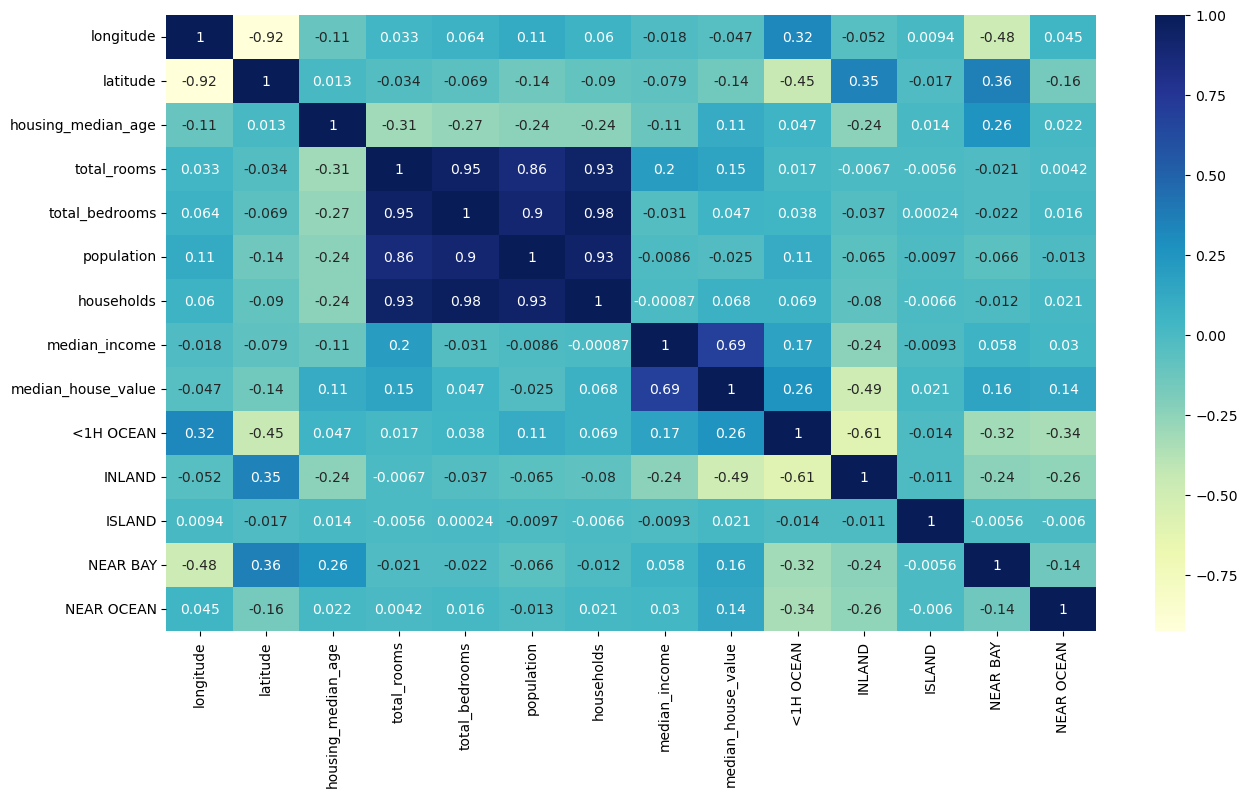

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

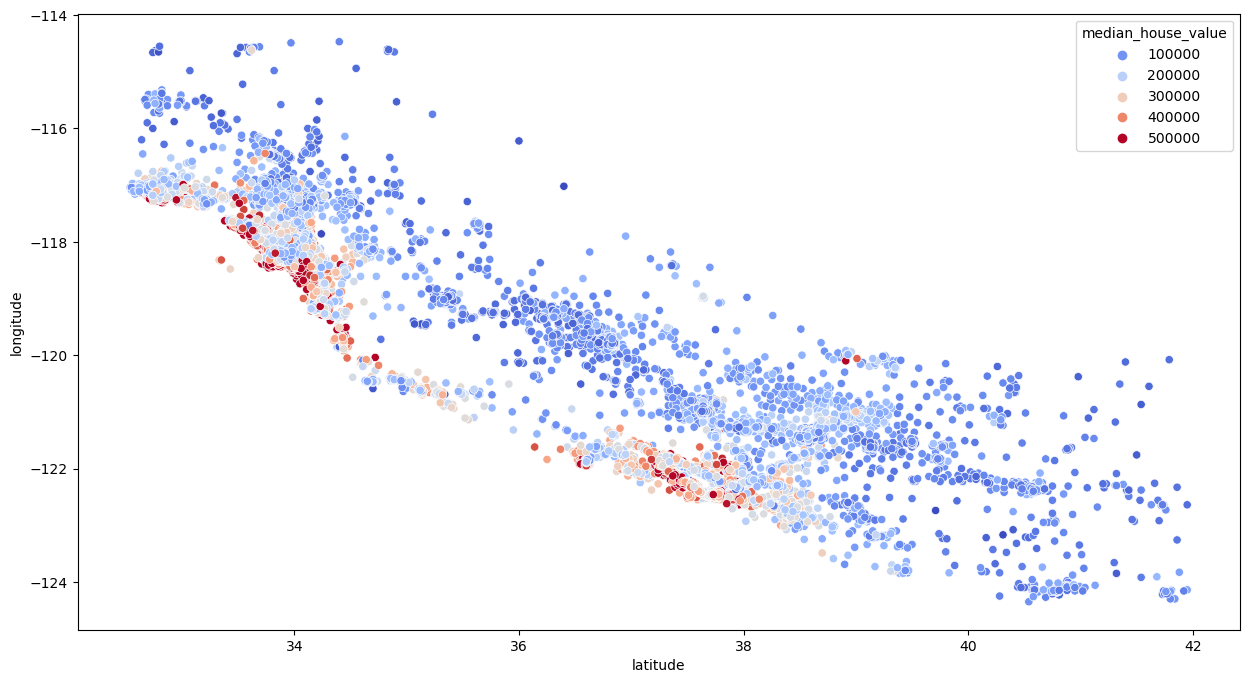

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data=train_data, hue="median_house_value", palette="coolwarm")

<AxesSubplot:>

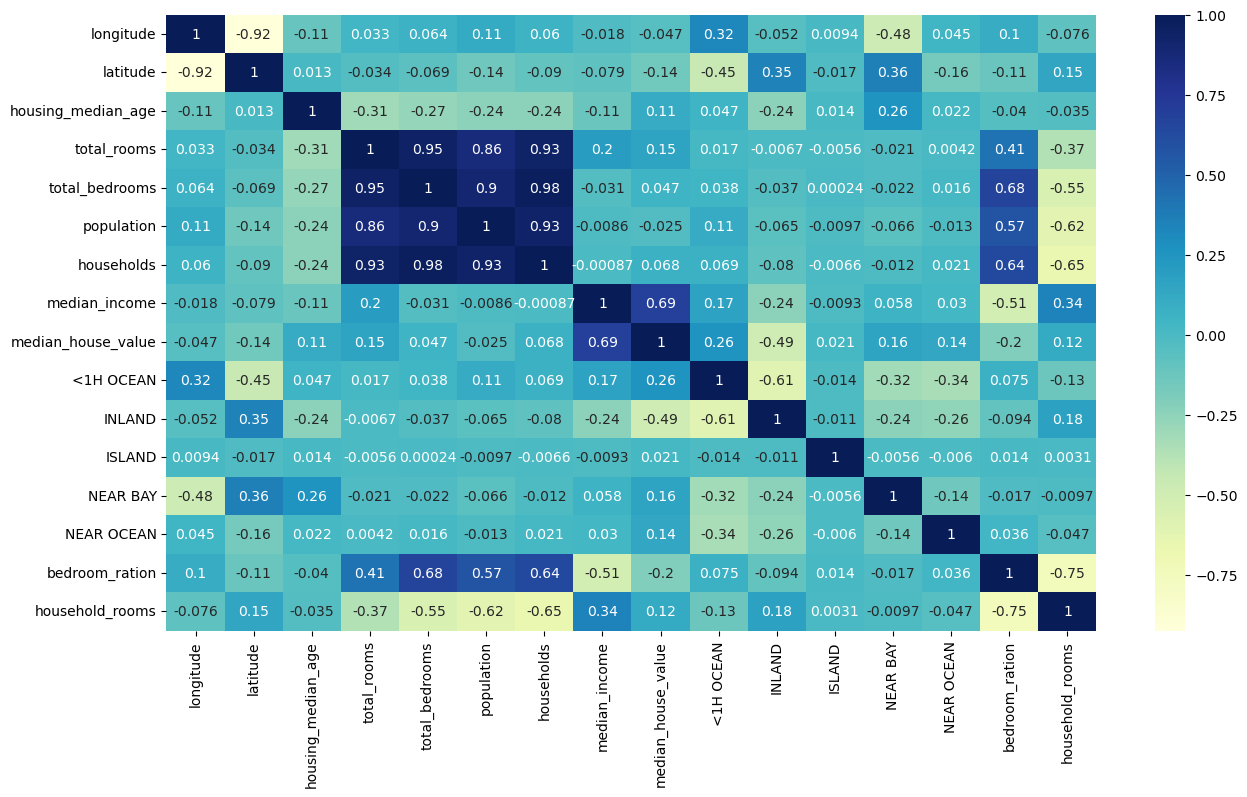

In [25]:
train_data['bedroom_ration'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data ['total_rooms'] / train_data['households']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap = "YlGnBu")

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [33]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data["total_rooms"]
test_data['household_rooms'] = test_data['total_rooms'] / test_data["households"]

In [34]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [66]:
forest.score(X_test_s, y_test)

0.8130568283802666

In [78]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [82]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8152817436639366